In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [56]:
train=pd.read_csv('train.csv',sep=',')
test=pd.read_csv('test.csv',sep=',')

In [57]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
train.shape

(891, 12)

In [61]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [62]:
train['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [63]:
train['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [64]:
train['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [65]:
train['Embarked']=train['Embarked'].fillna('C')

In [66]:
train['Age'] = np.where(train['Age'].between(0,1), 1, train['Age'])
test['Age'] = np.where(test['Age'].between(0,1), 1, test['Age'])

In [67]:
train['Age'].describe()

count    714.000000
mean      29.701681
std       14.521395
min        1.000000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [68]:
#del train['Cabin']
del train['Ticket']
#del test['Cabin']
del test['Ticket']

In [69]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [70]:
train['Cabin']=train['Cabin'].replace(np.nan,'N')
test['Cabin']=test['Cabin'].replace(np.nan,'N')

In [71]:
train['Cabin'].head()

0       N
1     C85
2       N
3    C123
4       N
Name: Cabin, dtype: object

In [72]:
train['Cabin_Deck']=train['Cabin'].str.extract('(\w)', expand=True)
test['Cabin_Deck']=test['Cabin'].str.extract('(\w)', expand=True)

In [73]:
train['Cabin_Deck'].head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin_Deck, dtype: object

In [74]:
train['Cabin_Deck'].unique(),test['Cabin_Deck'].unique().tolist()

(array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object),
 ['N', 'B', 'E', 'A', 'C', 'D', 'F', 'G'])

In [75]:
#train['Cabin_Deck'] = train['Cabin_Deck'].map({"N":1,"C":2,"E":3,"G":4,"D":5,"A":6,"B":7,"F":8,"T":9})
#test['Cabin_Deck'] = test['Cabin_Deck'].map({"N":1,"C":2,"E":3,"G":4,"D":5,"A":6,"B":7,"F":8,"T":9})

In [76]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [77]:
#train['Fare']=train['Fare'].replace(np.nan,14)
test['Fare']=test['Fare'].replace(np.nan,14)

In [78]:
df=train['Name'].str.split(',',expand=True)
df=df.rename(columns={0:'Last Name',1:'Name_1'})
df=df['Name_1'].str.split('.',expand=True)
del df[1]
del df[2]
df=df.rename(columns={0:'Title'})
df['PassengerId']=train['PassengerId']
train=train.merge(df,on='PassengerId',how='inner')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_Deck,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,N,S,N,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,N,S,N,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,N,S,N,Mr


In [79]:
dfa=test['Name'].str.split(',',expand=True)
dfa=dfa.rename(columns={0:'Last Name',1:'Name_1'})
dfa=dfa['Name_1'].str.split('.',expand=True)
del dfa[1]
dfa=dfa.rename(columns={0:'Title'})
dfa['PassengerId']=test['PassengerId']
dfa.head()
test=test.merge(dfa,on='PassengerId',how='inner')

In [80]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_Deck,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,N,S,N,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,N,S,N,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,N,S,N,Mr


In [81]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_Deck,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,N,Q,N,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,N,S,N,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,N,Q,N,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,N,S,N,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,N,S,N,Mrs


In [82]:
# train[train['Title'].str.match(' Ms')]['Age'].mean() Used to calculate averages as per different titles

In [83]:
master=train[train['Title'].str.match(' Master')]
mr=train[train['Title'].str.match(' Mr')]
mrs=train[train['Title'].str.match(' Mrs')]
miss=train[train['Title'].str.match(' Miss')]
dr=train[train['Title'].str.match(' Dr')]

master['Age']=master['Age'].fillna(5)
mr['Age']=mr['Age'].fillna(33)
mrs['Age']=mrs['Age'].fillna(36)
miss['Age']=miss['Age'].fillna(22)
dr['Age']=dr['Age'].fillna(42)

train.update(master,overwrite=False)
train.update(mr,overwrite=False)
train.update(mrs,overwrite=False)
train.update(miss,overwrite=False)
train.update(dr,overwrite=False)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_Deck,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,N,S,N,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,N,S,N,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,N,S,N,Mr


In [84]:
master=test[test['Title'].str.match(' Master')]
mr=test[test['Title'].str.match(' Mr')]
mrs=test[test['Title'].str.match(' Mrs')]
miss=test[test['Title'].str.match(' Miss')]
dr=test[test['Title'].str.match(' Dr')]
ms=test[test['Title'].str.match(' Ms')]

master['Age']=master['Age'].fillna(5)
mr['Age']=mr['Age'].fillna(33)
mrs['Age']=mrs['Age'].fillna(36)
miss['Age']=miss['Age'].fillna(22)
dr['Age']=dr['Age'].fillna(42)
ms['Age']=ms['Age'].fillna(28)

test.update(master,overwrite=False)
test.update(mr,overwrite=False)
test.update(mrs,overwrite=False)
test.update(miss,overwrite=False)
test.update(dr,overwrite=False)
test.update(ms,overwrite=False)

In [85]:
train['Title'].unique().tolist()

[' Mr',
 ' Mrs',
 ' Miss',
 ' Master',
 ' Don',
 ' Rev',
 ' Dr',
 ' Mme',
 ' Ms',
 ' Major',
 ' Lady',
 ' Sir',
 ' Mlle',
 ' Col',
 ' Capt',
 ' the Countess',
 ' Jonkheer']

In [86]:
train['Title']=train['Title'].str.replace('Don','Mr')
train['Title']=train['Title'].str.replace('Major','Mr')
train['Title']=train['Title'].str.replace('Capt','Mr')
train['Title']=train['Title'].str.replace('Jonkheer','Mr')
train['Title']=train['Title'].str.replace('Col','Mr')
train['Title']=train['Title'].str.replace('Sir','Mr')    

train['Title']=train['Title'].str.replace('the Countess','Mrs')
train['Title']=train['Title'].str.replace('Lady','Mrs')
train['Title']=train['Title'].str.replace('Mme','Mrs')
train['Title']=train['Title'].str.replace('Mlle','Miss')
train['Title']=train['Title'].str.replace('Ms','Miss')

train['Title'].unique().tolist()

test['Title']=test['Title'].str.replace('Don','Mr')
test['Title']=test['Title'].str.replace('Major','Mr')
test['Title']=test['Title'].str.replace('Capt','Mr')
test['Title']=test['Title'].str.replace('Jonkheer','Mr')
test['Title']=test['Title'].str.replace('Col','Mr')
test['Title']=test['Title'].str.replace('Sir','Mr')

test['Title']=test['Title'].str.replace('the Countess','Mrs')
test['Title']=test['Title'].str.replace('Lady','Mrs')
test['Title']=test['Title'].str.replace('Mra','Mrs')
test['Title']=test['Title'].str.replace('Mme','Mrs')
test['Title']=test['Title'].str.replace('Mlle','Miss')
test['Title']=test['Title'].str.replace('Ms','Miss')

test['Title'].unique().tolist()

[' Mr', ' Mrs', ' Miss', ' Master', ' Rev', ' Dr']

In [87]:
d1=train[['Title','PassengerId']]
d2=test[['Title','PassengerId']]
d=pd.concat([d1,d2])
d['Title'].unique().tolist()
onehot=pd.get_dummies(d['Title'],prefix='Title')
onehot['PassengerId']=d['PassengerId']

In [88]:
d1a=train[['Cabin_Deck','PassengerId']]
d2a=test[['Cabin_Deck','PassengerId']]
da=pd.concat([d1a,d2a])
da['Cabin_Deck'].unique().tolist()
onehota=pd.get_dummies(da['Cabin_Deck'],prefix='Cabin_Deck')
onehota['PassengerId']=d['PassengerId']

In [89]:
tt=pd.get_dummies(train[['Embarked','Sex']],prefix=('Embarked','Sex'))
tt['PassengerId']=train['PassengerId']
train=train.merge(tt,on='PassengerId',how='inner')

In [90]:
#train['Embarked'] = train['Embarked'].map({"S":1,"C":2,"Q":3})
train['Family_Size']=train['SibSp']+train['Parch']
train['Age*Class']=train['Age']*train['Pclass']
train['Fare_Per_Person']=train['Fare']/(train['Family_Size']+1)
train['Fare*Pclass']=(train['Fare']*train['Pclass'])
train['IsAlone']=(train['Family_Size']==0)*1
#train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

In [91]:
te=pd.get_dummies(test[['Embarked','Sex']],prefix=('Embarked','Sex'))
te['PassengerId']=test['PassengerId']
test=test.merge(te,on='PassengerId',how='inner')

In [92]:
#test['Embarked'] = test['Embarked'].map({"S":1,"C":2,"Q":3})
test['Family_Size']=test['SibSp']+test['Parch']
test['Age*Class']=test['Age']*test['Pclass']
test['Fare_Per_Person']=test['Fare']/(test['Family_Size']+1)
test['Fare*Pclass']=(test['Fare']*test['Pclass'])
test['IsAlone']=(test['Family_Size']==0)*1
#test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

In [93]:
train=train.merge(onehot,on='PassengerId',how='inner')
train=train.merge(onehota,on='PassengerId',how='inner')
train.head()
test=test.merge(onehot,on='PassengerId',how='inner')
test=test.merge(onehota,on='PassengerId',how='inner')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,...,Title_ Rev,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_N,Cabin_Deck_T
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,N,Q,...,0,0,0,0,0,0,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,N,S,...,0,0,0,0,0,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,N,Q,...,0,0,0,0,0,0,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,N,S,...,0,0,0,0,0,0,0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,N,S,...,0,0,0,0,0,0,0,0,1,0


In [94]:
train['Age'].describe()
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [95]:
clean_data=train.copy()

In [96]:
clean_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked', 'Cabin_Deck', 'Title',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male',
       'Family_Size', 'Age*Class', 'Fare_Per_Person', 'Fare*Pclass', 'IsAlone',
       'Title_ Dr', 'Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs',
       'Title_ Rev', 'Cabin_Deck_A', 'Cabin_Deck_B', 'Cabin_Deck_C',
       'Cabin_Deck_D', 'Cabin_Deck_E', 'Cabin_Deck_F', 'Cabin_Deck_G',
       'Cabin_Deck_N', 'Cabin_Deck_T'],
      dtype='object')

In [97]:
test_data=test.copy()

In [98]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'Cabin_Deck', 'Title', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Sex_female', 'Sex_male', 'Family_Size', 'Age*Class',
       'Fare_Per_Person', 'Fare*Pclass', 'IsAlone', 'Title_ Dr',
       'Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs', 'Title_ Rev',
       'Cabin_Deck_A', 'Cabin_Deck_B', 'Cabin_Deck_C', 'Cabin_Deck_D',
       'Cabin_Deck_E', 'Cabin_Deck_F', 'Cabin_Deck_G', 'Cabin_Deck_N',
       'Cabin_Deck_T'],
      dtype='object')

In [99]:
columns=['Pclass', 'Age', 'SibSp', 'Parch','Embarked_C','Fare', 'Embarked_Q', 'Embarked_S','Family_Size', 'Age*Class',
       'Fare_Per_Person', 'Fare*Pclass', 'IsAlone', 'Title_ Dr','Title_ Master', 'Sex_female', 'Sex_male',
       'Title_ Miss', 'Title_ Mr', 'Title_ Mrs', 'Title_ Rev', 'Cabin_Deck_A', 'Cabin_Deck_B', 'Cabin_Deck_C', 'Cabin_Deck_D',
       'Cabin_Deck_E', 'Cabin_Deck_F', 'Cabin_Deck_G', 'Cabin_Deck_N',
       'Cabin_Deck_T']

In [100]:
Y=clean_data[['Survived']].copy()
X=clean_data[columns]

In [101]:
T=test_data[columns]

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
X=clean_data[columns]
sel=SelectKBest(chi2,k=16)
sel.fit(X,Y)
X=sel.transform(X)
sel.scores_

In [102]:
X.head()

,Pclass,Age,SibSp,Parch,Embarked_C,Fare,Embarked_Q,Embarked_S,Family_Size,Age*Class,...,Title_ Rev,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_N,Cabin_Deck_T
0,3,22.0,1,0,0,7.2500,0,1,1,66.0,...,0,0,0,0,0,0,0,0,1,0
1,1,38.0,1,0,1,71.2833,0,0,1,38.0,...,0,0,0,1,0,0,0,0,0,0
2,3,26.0,0,0,0,7.9250,0,1,0,78.0,...,0,0,0,0,0,0,0,0,1,0
3,1,35.0,1,0,0,53.1000,0,1,1,35.0,...,0,0,0,1,0,0,0,0,0,0
4,3,35.0,0,0,0,8.0500,0,1,0,105.0,...,0,0,0,0,0,0,0,0,1,0


In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)
death_classifier = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=30, random_state=0)
death_classifier.fit(X_train,Y_train)
predictions=death_classifier.predict(X_test)
accuracy_score(y_true = Y_test,y_pred = predictions)

0.81016949152542372

In [104]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)
death_classifier = KNeighborsClassifier(n_neighbors=10)
death_classifier.fit(X_train,Y_train)
predictions=death_classifier.predict(X_test)
accuracy_score(y_true = Y_test,y_pred = predictions)

0.70508474576271185

In [105]:
##78.9% accuracy model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_scaled=scaler.fit_transform(X)
T_scaled=scaler.transform(T)
clf=LogisticRegression(C=100)
clf.fit(X_train_scaled,Y_train)
print(clf.score(X_test_scaled,Y_test))
#clf.fit(X_scaled,Y)
#log_pred=clf.predict(T_scaled)

0.830508474576


In [106]:
from sklearn.model_selection import cross_val_score
score1=cross_val_score(clf,X_scaled,Y,cv=10)
print(score1.mean())

0.827199807059


In [107]:
#Linear SVM
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
clf2=SVC(kernel='linear',C=1)
clf2.fit(X_train_scaled,Y_train)
clf2.score(X_test_scaled,Y_test)

0.82372881355932204

In [109]:
#Radial Based SVM
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_scaled=scaler.fit_transform(X)
T_scaled=scaler.transform(T)
clf3=SVC(kernel='rbf',C=100,gamma=0.15)
#clf3=SVC(C=50)
clf3.fit(X_train_scaled,Y_train)
clf3.score(X_test_scaled,Y_test)
#clf3.fit(X_scaled,Y)
#svm_pred=clf.predict(T_scaled)

0.8203389830508474

In [110]:
from sklearn.model_selection import cross_val_score
score2=cross_val_score(clf3,X_scaled,Y,cv=10)
print(score2.mean())

0.817200090796


In [114]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_train_scaled,Y_train)
model.score(X_test_scaled,Y_test)
score3=cross_val_score(model,X_scaled,Y,cv=10)
print(score3.mean())

0.811418113721


In [93]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(clf3, X, Y,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

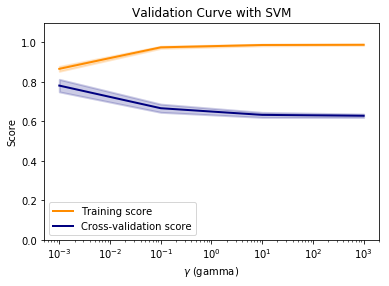

In [94]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

In [ ]:
#Kernel Linear SVM
#from sklearn.svm import SVC
#clf3=SVC(kernel='poly',degree=2)
#clf3.fit(X_train,Y_train)
#clf3.score(X_test,Y_test)

In [1850]:
def find_outliers(x):
    x_scaled=scale(list(map(float,x)))
    kde=KDEUnivariate(x_scaled)
    kde.fit(bw='scott',fft=True)
    pred=kde.evaluate(x_scaled)
    
    n=sum(pred<0.02)
    outlier_ind=np.asarray(pred).argsort()[:n]
    outlier_value=np.asarray(x)[outlier_ind]
    
    return outlier_ind,outlier_value
kde_ind,kde_val=find_outliers(X['Fare'])

In [1853]:
def histplt(x,y):
    plt.hist(list(x[y==0]),alpha=0.5,label='Survived = 0')
    plt.hist(list(x[y==1]),alpha=0.5,label='Survived = 1')
    plt.title('Histogram of "{var}" by Survival'.format(var=x.name))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()

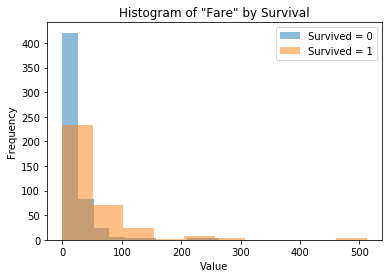

In [1856]:
histplt(X['Fare'],Y['Survived'])

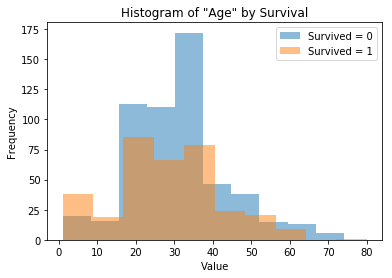

In [1855]:
histplt(X['Age'],Y['Survived'])

In [1857]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_inter(df):
    combos=list(combinations(list(df.columns),2))
    colnames=list(df.columns)+['_'.join(x) for x in combos]
    
    poly=PolynomialFeatures(interaction_only=True,include_bias=False)
    df=poly.fit_transform(df)
    df=pd.DataFrame(df)
    df.columns=colnames
    
    noint_indices=[i for i, x in enumerate(list((df==0).all())) if x]
    df=df.drop(df.columns[noint_indices],axis=1)
    return df

In [147]:
predictions=predictions.astype('int32')
type(predictions)

numpy.ndarray

In [157]:
col=log_pred
f=pd.DataFrame(col)
f=f.rename(columns={0:'Survived'})
f.shape
f['PassengerId']=test['PassengerId']
lis=['PassengerId','Survived']
f=f[lis]
f.shape
f=f.set_index('PassengerId',drop=True)
f.to_csv('LogReg_maxfeatures.csv')